# LAB | Probability distributions

## Import libraries here

In [1]:
# Libraries
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

### Generate samples and test normal distribution.
- Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.
- Read the documentation for `scipy.stats.norm.rvs` [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html). The function will help you create the normal random samples.

In [11]:
# Your code here
normal_distribution = stats.norm(50,5)
sample_size=[10, 50, 500, 5000]
samples = [normal_distribution.rvs(size) for size in sample_size ]

### Plot normal distributions.
- To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 
- Your output should look like the figure below:

![normal distributions with different sample sizes](images/ch-1.png)

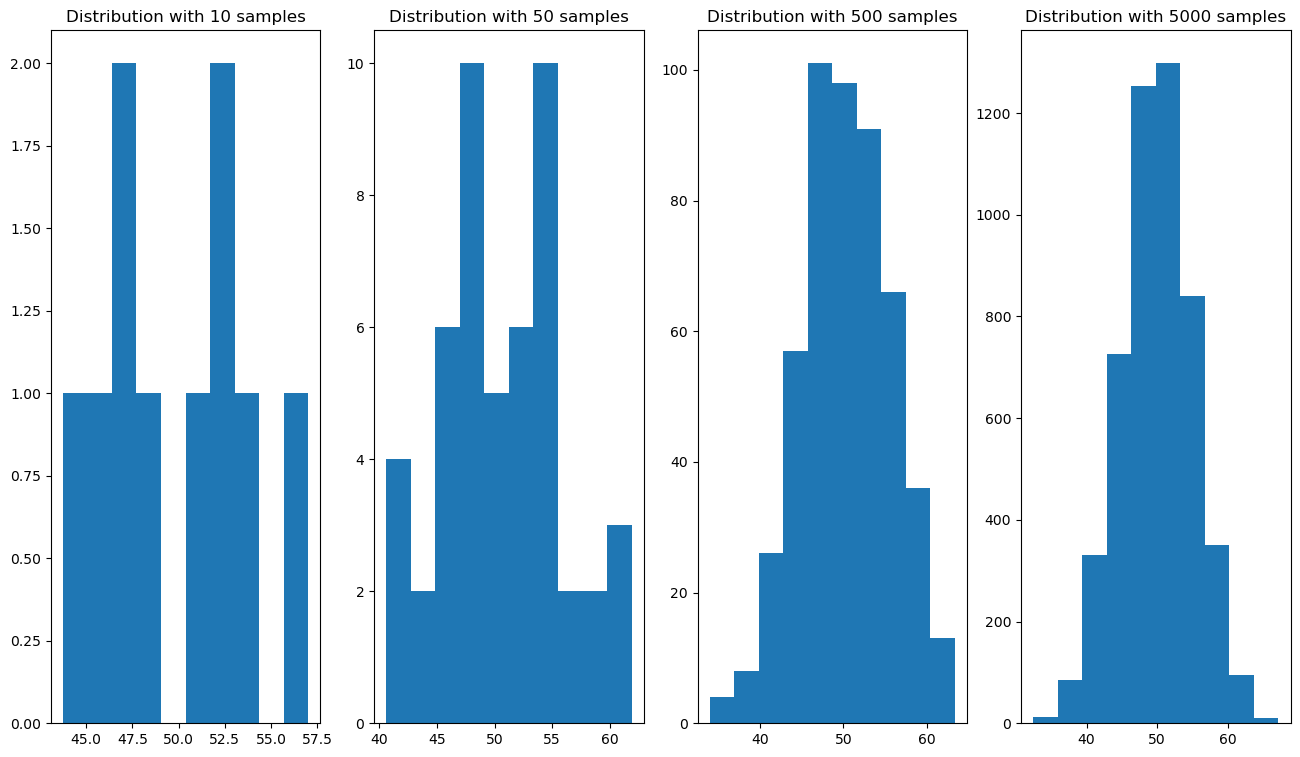

In [12]:
fig, axes = plt.subplots(1, 4, figsize = (16,9))
for i,s in enumerate(samples):
    axes[i].hist(s)
    axes[i].set_title(f'Distribution with {sample_size[i]} samples')

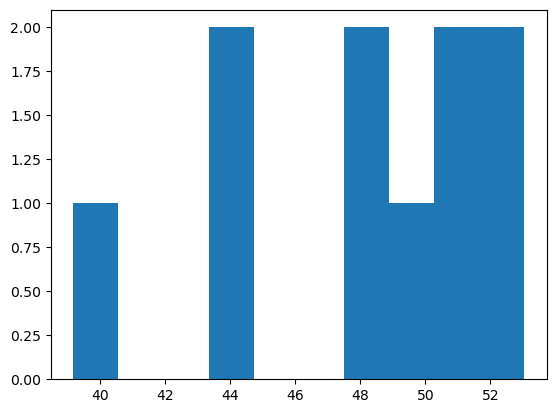

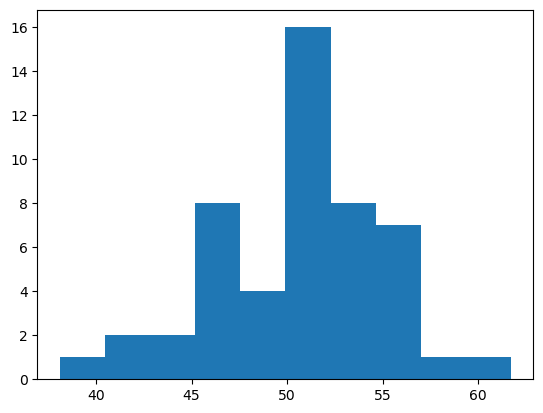

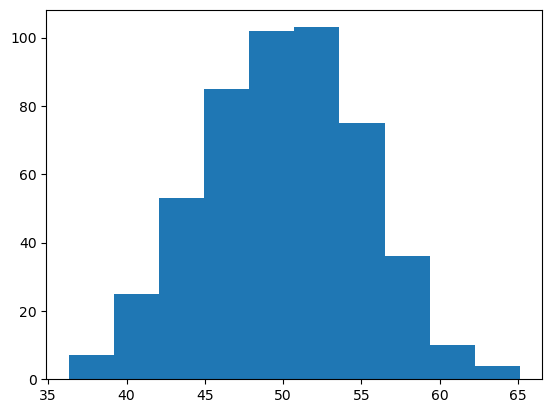

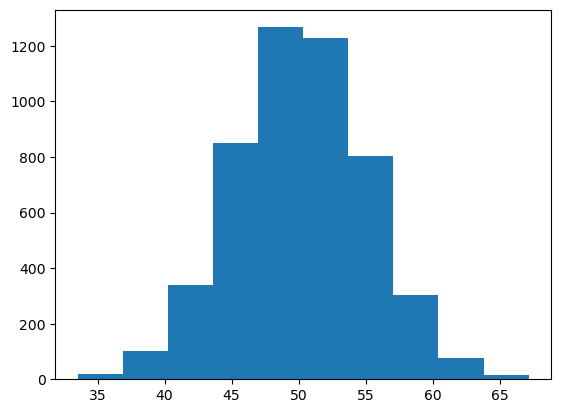

In [5]:
for s in samples:
    plt.hist(s)
    plt.show()

#### Compare the distributions above
- What do you observe? Explain with the Central Limit Theorem.

In [6]:
# Your answer here

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

- We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

####  Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.
```python
stats.binom(n, p)
```

In [13]:
# Your code here
n = 5
p = 0.15
dist= stats.binom(5,0.15)

#### Plot the PMF of the distribution. 
- Your output should look like the figure below:

![binom 10](images/ch-2.png)

<BarContainer object of 6 artists>

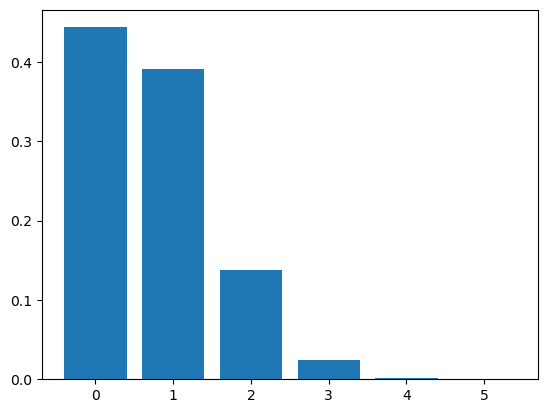

In [17]:
# Your code here
plt.bar([0,1,2,3,4,5],dist.pmf([0,1,2,3,4,5]))


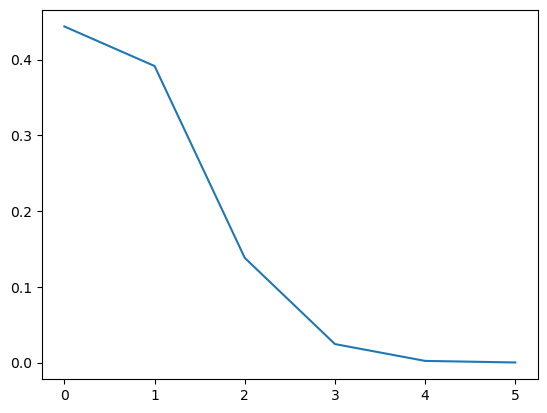

In [18]:
plt.plot([0,1,2,3,4,5],dist.pmf([0,1,2,3,4,5]))

#### Explain what you observe from the plot above.

In [11]:
# Your answer here

#### Now plot PMF with 50, 500, and 5000 visitors.
- To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.
- Your output should look like the figure below:
![prf](images/ch-2b.png)

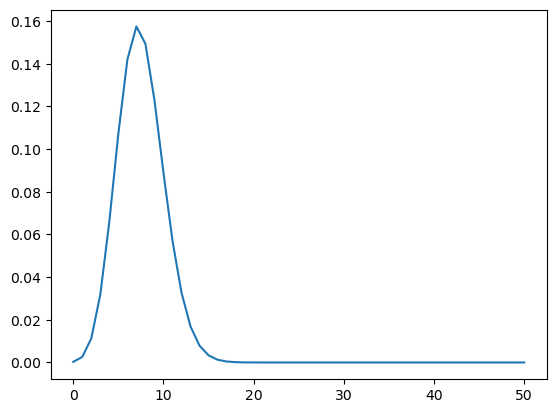

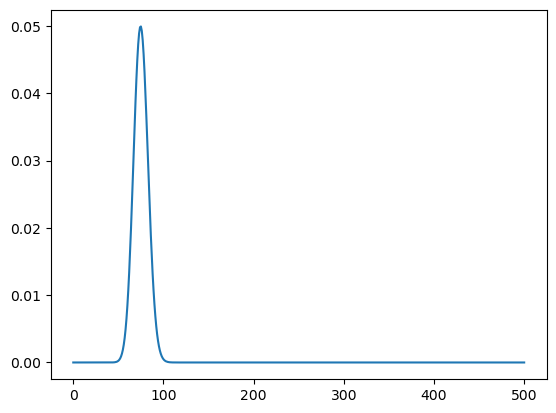

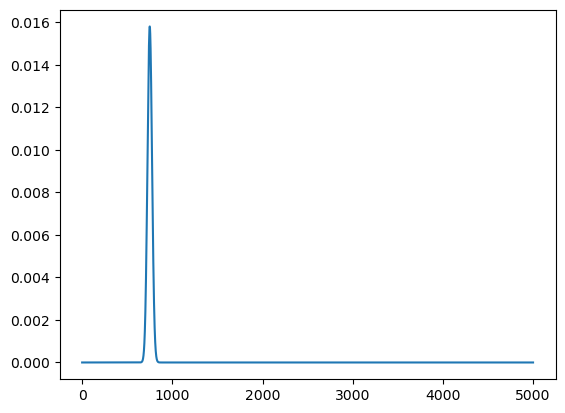

In [21]:
# Your code here
n_list = [50,500,5000]
for n in n_list:
    plt.plot(range(n+1),stats.binom(n,p).pmf(range(n+1)))
    plt.show()
    

#### What did you notice from the distribution plots?

In [14]:
# Your answer here

#  Challenge 3 - Poisson distribution

- The Poisson distribution is a discrete distribution function expressing probability of a given number of events occurring over a fixed interval of time or space.

- Using poisson distribution, solve the challenge below
- A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?
```python
scipy.stats.poisson.pmf()
```

In [22]:
# Your code here
poisson = stats.poisson(300)
poisson.pmf(320)

0.011612348610402475

In [25]:
stats.poisson.pmf(320,300)

0.011612348610402475

In [26]:
stats.poisson(300).pmf(320)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [23]:
# Your code here
poisson.pmf(60)

2.622743762294515e-64

#### Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [28]:
# Your code here
range_1000 = range(1001)
arr =stats.poisson(300).pmf(range_1000)
arr

array([5.14820022e-131, 1.54446007e-128, 2.31669010e-126, ...,
       1.87753873e-220, 5.63825446e-221, 1.69147634e-221])

#### Plot the probabilities.
- Your output should look like the figure below:
![poisson distribution](images/ch-3.png)

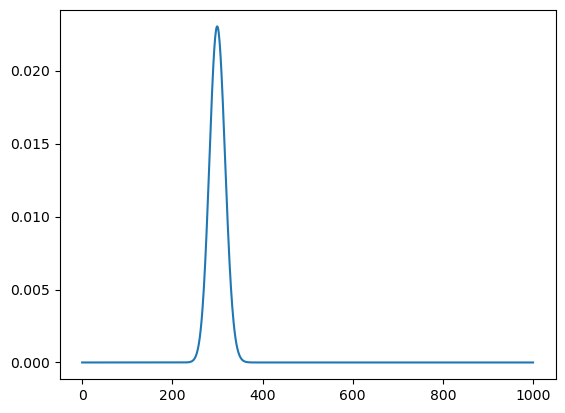

In [29]:
# Your code here
plt.plot(range_1000,arr)

# Challenge 4 - Central Limit Theorem
- In this challenge we will work with the central limit theorem
- A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.
- What is the probability that the mean delivery time today is between 30 and 35 minutes?
```python
stats.norm.cdf()
```

In [31]:
# Your code here
average= 35
stdev = 8
n_sample = 200
stdev_sample = stdev/np.sqrt(n_sample)


normal_dist = stats.norm(average,stdev_sample)
normal_dist.cdf(35)-normal_dist.cdf(30)

0.5

#### What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [36]:
# Your code here
average= 35
stdev = 8
n_sample = 200
stdev_sample = stdev/np.sqrt(n_sample)


normal_dist = stats.norm(average,stdev_sample)
total_minutes_delivery = 115*60
minutes_per_package = total_minutes_delivery/200
1- normal_dist.cdf(minutes_per_package)

0.8116204410942089

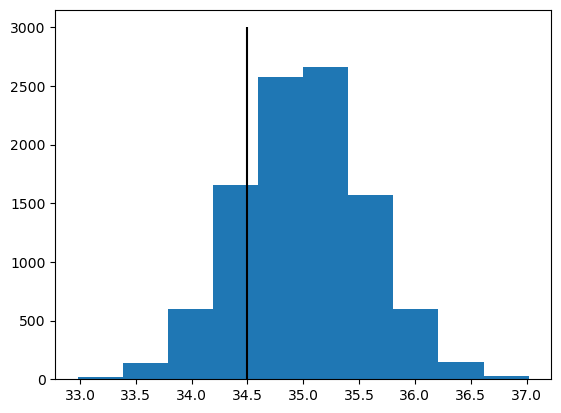

In [40]:
plt.hist(normal_dist.rvs(10000));
plt.vlines(minutes_per_package,0,3000,color='black')

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.
- Find the probability that the monthly sales are more than 300.
```python
stats.norm.cdf()
```


In [42]:
# Your code here
normal_dist = stats.norm(200,40)
1 - normal_dist.cdf(300)

0.006209665325776159

#### Find the probability that the monthly sales fall between 160 and 240.

In [43]:
# Your code here
normal_dist.cdf(240)-normal_dist.cdf(160) #

0.6826894921370859

#### Find the probability that the monthly sales do not exceed 150.

In [44]:
# Your code here
normal_dist.cdf(150)

0.10564977366685535

#### Find the probability that the monthly sales exceed 3000.

In [45]:
# Your code here
1-normal_dist.cdf(3000)

0.0

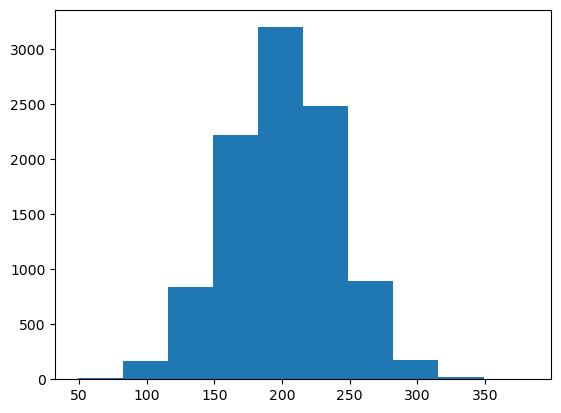

In [46]:
plt.hist(normal_dist.rvs(10000));


# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.
- Find the probability that in a particular month there is no violent robbery.
```python
stats.norm.cdf()
```

In [48]:
# Your code here
stats.poisson(4).pmf(0)

0.01831563888873418

#### Find the probability that there are at least 1 robbery in a given month.

In [49]:
# Your code here
stats.poisson(4).cdf(1)

0.0915781944436709

#### Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [53]:
# Your code here
stats.poisson(4).cdf(6) - stats.poisson(4).cdf(1)

0.7977478271537555

#### Find the probability that there are more than 2 robberies in 15 days.

In [51]:
# Your code here
# 2 robberies in 15 days is equal to 4 robberies a month
1 - stats.poisson(4).cdf(4)

0.3711630648201266

(array([9.1350e+03, 1.4550e+04, 3.9110e+04, 1.5685e+04, 1.6316e+04,
        3.0540e+03, 1.8640e+03, 1.7700e+02, 9.9000e+01, 1.0000e+01]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

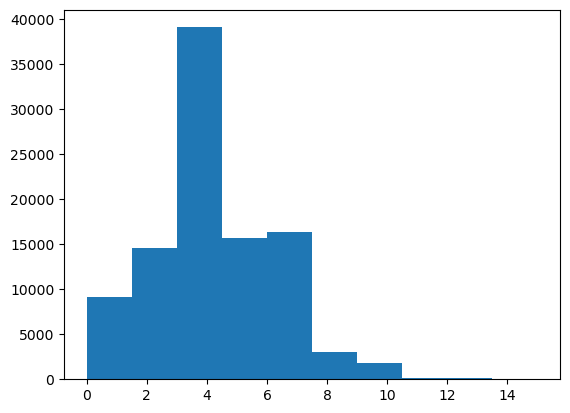

In [52]:
plt.hist(stats.poisson(4).rvs(100000))